In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
data_Weiht_Height = pd.read_csv('./Data/weight-height3.csv')
data_Weiht_Height.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [51]:
Original_data_Weiht_Height = pd.read_csv('./Data/weight-height.csv')
Original_data_Weiht_Height.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [52]:
original_dataFeMale = Original_data_Weiht_Height[Original_data_Weiht_Height['Gender'] != 'Male']
original_dataFeMale

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#### Finding Outliars from a Data Set
##### The Original dataset was purposely filrated with Outliars 
##### Lets find the outliars that were purposely added to the Original Data Set

##### original_dataFeMale  VS dataFeMale

In [3]:
dataFeMale = data_Weiht_Height[data_Weiht_Height['Gender'] != 'Male']
dataFeMale

,Gender,Height,Weight
5000,Female,14.263133,64.700127
5001,Female,14.616858,71.393749
5002,Female,14.873728,78.606670
5003,Female,25.148557,88.812412
5004,Female,25.336492,88.366583
...,...,...,...
9995,Female,171.552205,185.658271
9996,Female,172.429771,177.969532
9997,Female,271.438947,175.035492
9998,Female,272.264748,188.437304


In [5]:
dataFeMale.max()

Gender        Female
Height    273.389586
Weight    202.237214
dtype: object

In [6]:
dataFeMale.min()

Gender       Female
Height    14.263133
Weight    64.700127
dtype: object

In [7]:
dataFeMale.Gender.value_counts(dropna=False)

Female    5000
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Height', ylabel='Count'>

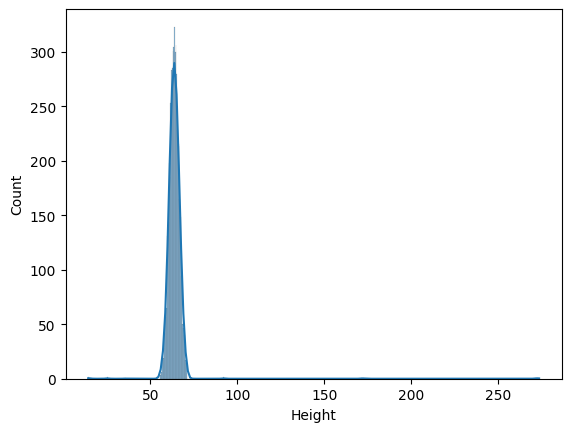

In [8]:
sns.histplot(dataFeMale.Height, kde= True)

In [9]:
meanFeMaleHeight  = dataFeMale.Height.mean()
meanFeMaleHeight

63.836773603488005

In [10]:
stdFeMaleHeight  = dataFeMale.Height.std()
stdFeMaleHeight

6.356023072493566

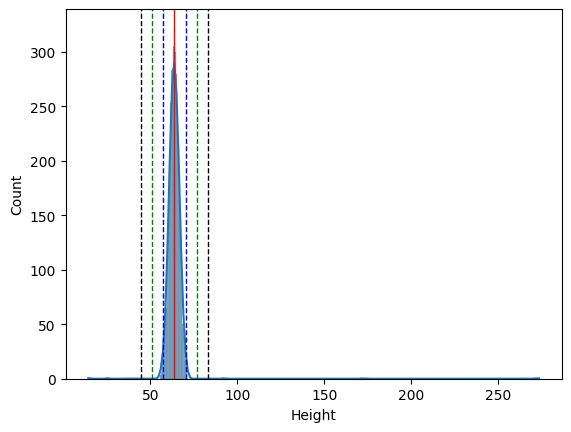

In [11]:
sns.histplot(dataFeMale.Height, kde= True)
plt.axvline(meanFeMaleHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanFeMaleHeight + stdFeMaleHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - stdFeMaleHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanFeMaleHeight + 2* stdFeMaleHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - 2* stdFeMaleHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanFeMaleHeight + 3* stdFeMaleHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - 3* stdFeMaleHeight, color='black',linestyle = 'dashed', linewidth =1)




In [12]:
l1 = round(meanFeMaleHeight - stdFeMaleHeight,2)
r1 = round(meanFeMaleHeight + stdFeMaleHeight,2)
l1, r1

(57.48, 70.19)

In [13]:
l2 = round(meanFeMaleHeight - 2*stdFeMaleHeight,2)
r2 = round(meanFeMaleHeight + 2*stdFeMaleHeight,2)
l2, r2

(51.12, 76.55)

In [14]:
l3 = round(meanFeMaleHeight - 3*stdFeMaleHeight,6)
r3 = round(meanFeMaleHeight + 3*stdFeMaleHeight,6)
l3, r3

(44.768704, 82.904843)

In [15]:
(dataFeMale[(dataFeMale.Height>l1)&(dataFeMale.Height<r1)].shape[0]/dataFeMale.shape[0])*100

98.08

In [16]:
(dataFeMale[(dataFeMale.Height>l2)&(dataFeMale.Height<r2)].shape[0]/dataFeMale.shape[0])*100

99.74

In [17]:
(dataFeMale[(dataFeMale.Height>l3)&(dataFeMale.Height<r3)].shape[0]/dataFeMale.shape[0])*100

99.74

In [38]:
validFeMaleData = dataFeMale[(dataFeMale.Height>l3)&(dataFeMale.Height<r3)]
validFeMaleData

,Gender,Height,Weight
5007,Female,55.739737,108.121968
5008,Female,55.851214,103.767137
5009,Female,55.979198,85.417534
5010,Female,56.066636,89.571205
5011,Female,56.078700,94.488374
...,...,...,...
9988,Female,70.932194,175.954401
9989,Female,70.950659,193.225927
9990,Female,71.070451,182.083580
9991,Female,71.122793,176.040345


In [39]:
meanFeMaleHeight= validFeMaleData.Height.mean()
meanFeMaleHeight

63.70901603082431

In [40]:
stdFeMaleHeight  = validFeMaleData.Height.std()
stdFeMaleHeight

2.6616829804008604

In [41]:
l1 = round(meanFeMaleHeight - stdFeMaleHeight,2)
r1 = round(meanFeMaleHeight + stdFeMaleHeight,2)
l1, r1

(61.05, 66.37)

In [42]:
l2 = round(meanFeMaleHeight - 2*stdFeMaleHeight,2)
r2 = round(meanFeMaleHeight + 2*stdFeMaleHeight,2)
l2, r2

(58.39, 69.03)

In [43]:
l3 = round(meanFeMaleHeight - 3*stdFeMaleHeight,6)
r3 = round(meanFeMaleHeight + 3*stdFeMaleHeight,6)
l3, r3

(55.723967, 71.694065)

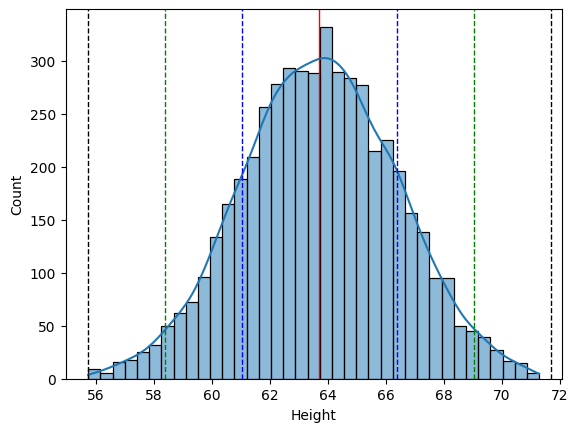

In [44]:
sns.histplot(validFeMaleData.Height, kde= True)
plt.axvline(meanFeMaleHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanFeMaleHeight + stdFeMaleHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - stdFeMaleHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanFeMaleHeight + 2* stdFeMaleHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - 2* stdFeMaleHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanFeMaleHeight + 3* stdFeMaleHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanFeMaleHeight - 3* stdFeMaleHeight, color='black',linestyle = 'dashed', linewidth =1)




In [45]:
(validFeMaleData[(validFeMaleData.Height>l1)&(validFeMaleData.Height<r1)].shape[0]/validFeMaleData.shape[0])*100

67.68953068592057

In [46]:
(validFeMaleData[(validFeMaleData.Height>l2)&(validFeMaleData.Height<r2)].shape[0]/validFeMaleData.shape[0])*100

95.24669073405535

In [47]:
(validFeMaleData[(validFeMaleData.Height>l3)&(validFeMaleData.Height<r3)].shape[0]/validFeMaleData.shape[0])*100

100.0

In [49]:
outliarsFeMaleData = dataFeMale[(dataFeMale.Height<l3)|(dataFeMale.Height>r3)]
outliarsFeMaleData

,Gender,Height,Weight
5000,Female,14.263133,64.700127
5001,Female,14.616858,71.393749
5002,Female,14.873728,78.606670
5003,Female,25.148557,88.812412
5004,Female,25.336492,88.366583
5005,Female,35.651892,85.621776
5006,Female,55.668202,68.982530
9993,Female,91.991257,177.366002
9994,Female,92.088712,192.530863
9995,Female,171.552205,185.658271


In [50]:
outliarsFeMaleData.shape

(14, 3)

##### Original Data Min and Max

In [74]:
OriginalMax = original_dataFeMale.Height.max() 
OriginalMax



73.3895858660697

In [75]:
OriginalMin = original_dataFeMale.Height.min()
OriginalMin

54.2631333250971

In [76]:
original_dataFeMale.shape[0]

5000

##### Filtered Data Min and Max

In [79]:
newMax = validFeMaleData.Height.max() 
newMax



71.27750694

In [80]:
newMin = validFeMaleData.Height.min()
newMin

55.73973682

##### Filtrated Data Min and Max (Datas with Outliars)

In [77]:
filtratedDataMax = data_Weiht_Height.Height.max()
filtratedDataMax

273.3895859

In [78]:
filtratedDataMin = data_Weiht_Height.Height.min()
filtratedDataMin

14.26313333

##### Outliars Min and Max

In [68]:
outliarsFeMaleDataMax = outliarsFeMaleData.Height.max()
outliarsFeMaleDataMax

273.3895859

In [70]:
outliarsFeMaleDataMin = outliarsFeMaleData.Height.min()
outliarsFeMaleDataMin


14.26313333

##### New Data Min and Max

In [73]:
validFeMaleData.shape[0]

4986

In [63]:
original_dataFeMale.shape[0] - validFeMaleData.shape[0]

14

#### Conclusion
##### 13 Values were purposely added, However 14 values were returned percentage accuracy= 99%